# First exercise
Write a function that takes two numbers and returns their sum. Include type hints and a docstring.

Create a decorator that times how long a function takes to execute.

In [3]:
import time
from functools import wraps
from typing import Union

def timer_decorator(func):
    """Decorator that times how long a function takes to execute."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{func.__name__} took {execution_time:.6f} seconds to execute")
        return result
    return wrapper

@timer_decorator
def suma(a: Union[int, float], b: Union[int, float]) -> Union[int, float]:
    """
    Takes two numbers and returns their sum.
    
    Args:
        a: First number
        b: Second number
    
    Returns:
        The sum of a and b
    """
    return a + b

# Uso
result = suma(2, 4)
print(f"Result: {result}")

suma took 0.000002 seconds to execute
Result: 6


# Second Exercise

You’re simulating the motion of 3 particles (e.g., electrons in a magnetic field) over time. You have:

Time points (list)

Positions at each time (list of tuples)

Unique particle IDs (set)

A dictionary mapping particle ID → trajectory (list of positions)

Goal: Find all particles that passed near a specific point (e.g., (0,0)).

In [4]:
# Given:
time_points = [0, 1, 2, 3, 4]  # seconds
particles = {"P1", "P2", "P3"}  # unique IDs
trajectories = {
    "P1": [(1.0, 2.0), (0.5, 0.3), (0.1, -0.1), (0.0, 0.01), (-0.2, -0.3)],
    "P2": [(2.0, 1.0), (1.8, 0.9), (1.5, 0.6), (1.0, 0.2), (0.5, -0.1)],
    "P3": [(-1.0, -1.0), (-0.5, -0.5), (0.0, 0.0), (0.2, 0.1), (0.3, 0.4)]
}

# Task: Find which particles came within 0.2 units of (0,0)

# Your code here:
# Importar la función sqrt para calcular la distancia euclidiana
import math

# Lista para almacenar las partículas que pasan cerca del punto (0,0)
particles_near_origin = []

# Punto objetivo al que queremos ver qué partículas se acercan
target_point = (0, 0)
# Distancia máxima permitida (umbral)
max_distance = 0.2

print("Analizando trayectorias de partículas...")
print(f"Buscando partículas que pasen a menos de {max_distance} unidades del punto {target_point}")
print("-" * 60)

# Iterar sobre cada partícula en el diccionario de trayectorias
for particle_id, trajectory in trajectories.items():
    print(f"\nAnalizando partícula {particle_id}:")
    
    # Variable para rastrear si esta partícula pasa cerca del origen
    particle_is_near = False
    
    # Iterar sobre cada posición en la trayectoria de la partícula actual
    for i, position in enumerate(trajectory):
        # Extraer las coordenadas x, y de la tupla de posición
        x, y = position
        
        # Calcular la distancia euclidiana desde la posición actual hasta el origen (0,0)
        # Fórmula: distancia = √(x² + y²)
        distance = math.sqrt(x**2 + y**2)
        
        # Mostrar información de cada posición (opcional para debugging)
        print(f"  Tiempo {time_points[i]}: posición {position}, distancia = {distance:.4f}")
        
        # Verificar si la distancia está dentro del umbral permitido
        if distance <= max_distance:
            print(f"    ¡La partícula {particle_id} pasa cerca del origen!")
            
            # Agregar la partícula a la lista de resultados
            particles_near_origin.append(particle_id)
            
            # Marcar que esta partícula ya fue encontrada
            particle_is_near = True
            
            # No necesitamos revisar más posiciones de esta partícula
            # Una vez que sabemos que pasa cerca, es suficiente
            break
    
    # Si la partícula no pasó cerca, informarlo
    if not particle_is_near:
        print(f"  La partícula {particle_id} nunca pasa cerca del origen.")

# Mostrar resultados finales
print("\n" + "="*60)
print("RESULTADOS:")
print(f"Partículas que pasaron a menos de {max_distance} unidades del origen {target_point}:")

if particles_near_origin:
    for particle in particles_near_origin:
        print(f"  - {particle}")
    print(f"\nTotal: {len(particles_near_origin)} partícula(s)")
else:
    print("  Ninguna partícula pasó suficientemente cerca.")

Analizando trayectorias de partículas...
Buscando partículas que pasen a menos de 0.2 unidades del punto (0, 0)
------------------------------------------------------------

Analizando partícula P1:
  Tiempo 0: posición (1.0, 2.0), distancia = 2.2361
  Tiempo 1: posición (0.5, 0.3), distancia = 0.5831
  Tiempo 2: posición (0.1, -0.1), distancia = 0.1414
    ¡La partícula P1 pasa cerca del origen!

Analizando partícula P2:
  Tiempo 0: posición (2.0, 1.0), distancia = 2.2361
  Tiempo 1: posición (1.8, 0.9), distancia = 2.0125
  Tiempo 2: posición (1.5, 0.6), distancia = 1.6155
  Tiempo 3: posición (1.0, 0.2), distancia = 1.0198
  Tiempo 4: posición (0.5, -0.1), distancia = 0.5099
  La partícula P2 nunca pasa cerca del origen.

Analizando partícula P3:
  Tiempo 0: posición (-1.0, -1.0), distancia = 1.4142
  Tiempo 1: posición (-0.5, -0.5), distancia = 0.7071
  Tiempo 2: posición (0.0, 0.0), distancia = 0.0000
    ¡La partícula P3 pasa cerca del origen!

RESULTADOS:
Partículas que pasaron 

In [5]:
"""
PROBLEMA: Encontrar moléculas que aparecen en 2 o más tipos de reacción

ESTRATEGIA:
1. Contar en cuántos tipos de reacción aparece cada molécula
2. Filtrar las que aparecen en ≥2 tipos
"""

# DATOS DEL PROBLEMA
# ==================
molecules = ["H2", "O2", "H2O", "CO2", "CH4", "O2", "CO2"]  # Lista con duplicados (no la usamos)
reaction_types = {"combustion", "oxidation", "hydrolysis"}    # Conjunto de tipos (no la usamos)
reactions = {
    "combustion": ["CH4", "O2", "CO2", "H2O"],     # Combustión: 4 moléculas
    "oxidation": ["Fe", "O2", "Fe2O3"],            # Oxidación: 3 moléculas  
    "hydrolysis": ["NaCl", "H2O", "NaOH", "HCl"]  # Hidrólisis: 4 moléculas
}

print("🔬 ANALIZANDO MOLÉCULAS EN DIFERENTES TIPOS DE REACCIONES")
print("=" * 60)

# PASO 1: CREAR CONTADOR
# ======================
# Diccionario que mapea: molécula → cantidad de tipos de reacción donde aparece
molecule_count = {}

print("📊 PROCESO DE CONTEO:")
print("-" * 30)

# PASO 2: ITERAR SOBRE CADA TIPO DE REACCIÓN
# ===========================================
for reaction_type, molecule_list in reactions.items():
    print(f"\n🧪 Analizando '{reaction_type}': {molecule_list}")
    
    # PASO 3: PROCESAR CADA MOLÉCULA DE ESTE TIPO DE REACCIÓN
    # ========================================================
    for molecule in molecule_list:
        # PASO 4: MÉTODO .GET() PARA INCREMENTAR CONTADOR
        # ===============================================
        # ¿Qué hace .get(molecule, 0)?
        # - Si 'molecule' YA EXISTE en molecule_count: devuelve su valor actual
        # - Si 'molecule' NO EXISTE: devuelve 0 (valor por defecto)
        # Luego sumamos 1 para incrementar
        
        old_count = molecule_count.get(molecule, 0)  # Valor actual o 0
        new_count = old_count + 1                    # Incrementar
        molecule_count[molecule] = new_count         # Actualizar diccionario
        
        # Versión corta (lo mismo en una línea):
        # molecule_count[molecule] = molecule_count.get(molecule, 0) + 1
        
        print(f"   {molecule}: {old_count} → {new_count} tipo(s) de reacción")

# MOSTRAR CONTEO COMPLETO
print(f"\n" + "=" * 60)
print("📈 CONTEO FINAL POR MOLÉCULA:")
print("-" * 30)
for molecule, count in molecule_count.items():
    print(f"  {molecule}: aparece en {count} tipo(s) de reacción")

# PASO 5: FILTRAR MOLÉCULAS QUE APARECEN EN ≥2 TIPOS
# ==================================================
molecules_in_multiple_reactions = []  # Lista para almacenar resultados

print(f"\n" + "=" * 60)
print("🔍 FILTRADO (buscando moléculas en ≥2 tipos de reacción):")
print("-" * 30)

# Iterar sobre cada molécula y su conteo
for molecule, count in molecule_count.items():
    if count >= 2:  # Si aparece en 2 o más tipos
        molecules_in_multiple_reactions.append(molecule)
        print(f"  ✅ {molecule}: aparece en {count} tipos → INCLUIDA")
    else:  # Si aparece en solo 1 tipo
        print(f"  ❌ {molecule}: solo aparece en {count} tipo → EXCLUIDA")

# MOSTRAR RESULTADO FINAL
print(f"\n" + "🎯" + "=" * 58)
print("RESULTADO FINAL:")
print("-" * 20)

if molecules_in_multiple_reactions:
    print(f"Moléculas que aparecen en ≥2 tipos de reacción:")
    for i, molecule in enumerate(molecules_in_multiple_reactions, 1):
        print(f"  {i}. {molecule}")
    print(f"\n📊 Total: {len(molecules_in_multiple_reactions)} molécula(s)")
else:
    print("❌ No hay moléculas que aparezcan en múltiples tipos de reacción")

# EXPLICACIÓN DEL RESULTADO ESPERADO
print(f"\n" + "💡" + "=" * 58)
print("EXPLICACIÓN:")
print("-" * 15)
print("• O2 aparece en 'combustion' Y 'oxidation' → 2 tipos ✅")
print("• H2O aparece en 'combustion' Y 'hydrolysis' → 2 tipos ✅") 
print("• Todas las demás moléculas aparecen solo en 1 tipo ❌")
print("• Por tanto, solo O2 y H2O deberían estar en el resultado final")

🔬 ANALIZANDO MOLÉCULAS EN DIFERENTES TIPOS DE REACCIONES
📊 PROCESO DE CONTEO:
------------------------------

🧪 Analizando 'combustion': ['CH4', 'O2', 'CO2', 'H2O']
   CH4: 0 → 1 tipo(s) de reacción
   O2: 0 → 1 tipo(s) de reacción
   CO2: 0 → 1 tipo(s) de reacción
   H2O: 0 → 1 tipo(s) de reacción

🧪 Analizando 'oxidation': ['Fe', 'O2', 'Fe2O3']
   Fe: 0 → 1 tipo(s) de reacción
   O2: 1 → 2 tipo(s) de reacción
   Fe2O3: 0 → 1 tipo(s) de reacción

🧪 Analizando 'hydrolysis': ['NaCl', 'H2O', 'NaOH', 'HCl']
   NaCl: 0 → 1 tipo(s) de reacción
   H2O: 1 → 2 tipo(s) de reacción
   NaOH: 0 → 1 tipo(s) de reacción
   HCl: 0 → 1 tipo(s) de reacción

📈 CONTEO FINAL POR MOLÉCULA:
------------------------------
  CH4: aparece en 1 tipo(s) de reacción
  O2: aparece en 2 tipo(s) de reacción
  CO2: aparece en 1 tipo(s) de reacción
  H2O: aparece en 2 tipo(s) de reacción
  Fe: aparece en 1 tipo(s) de reacción
  Fe2O3: aparece en 1 tipo(s) de reacción
  NaCl: aparece en 1 tipo(s) de reacción
  NaOH: ap

# Third Exercise
Create a Model class with attributes like name and accuracy.

Add a method to the Model class that prints the model’s information.

In [6]:
class Model:
    def __init__(self, name: str, accuracy: float):
        """
        Initialize a Model instance.
        
        Args:
            name (str): Name of the model
            accuracy (float): Accuracy of the model (typically between 0.0 and 1.0)
        """
        self.name = name
        self.accuracy = accuracy
        print(f"Model '{self.name}' with {self.accuracy:.2%} accuracy has been created.")
    
    def print_info(self):
        """
        Print the model's information.
        
        Returns:
            str: A string containing the model's name and accuracy
        """
        info = f"Model Name: {self.name}, Accuracy: {self.accuracy:.2%}"
        print(info)
        return info
    
    def __del__(self):
        """
        Destructor method called when the object is being destroyed.
        Useful for cleanup tasks and logging destruction.
        """
        print(f"Model '{self.name}' is being destroyed.")

# EJEMPLOS DE USO
# ===============

print("=== Creando modelos ===")

# Crear instancias de la clase Model
model1 = Model("RandomForest", 0.85)
model2 = Model("Neural Network", 0.92)
model3 = Model("SVM", 0.78)

print("\n=== Mostrando información de los modelos ===")

# Usar el método print_info() para mostrar información
model1.print_info()
model2.print_info()
model3.print_info()

print("\n=== Eliminando modelos explícitamente ===")

# Eliminar objetos explícitamente (esto llamará __del__)
del model1
del model2

print("\n=== El modelo3 aún existe ===")
model3.print_info()

print("\n=== Al final del programa, model3 será destruido automáticamente ===")
# model3 será destruido automáticamente cuando termine el programa

=== Creando modelos ===
Model 'RandomForest' with 85.00% accuracy has been created.
Model 'Neural Network' with 92.00% accuracy has been created.
Model 'SVM' with 78.00% accuracy has been created.

=== Mostrando información de los modelos ===
Model Name: RandomForest, Accuracy: 85.00%
Model Name: Neural Network, Accuracy: 92.00%
Model Name: SVM, Accuracy: 78.00%

=== Eliminando modelos explícitamente ===
Model 'RandomForest' is being destroyed.
Model 'Neural Network' is being destroyed.

=== El modelo3 aún existe ===
Model Name: SVM, Accuracy: 78.00%

=== Al final del programa, model3 será destruido automáticamente ===


# Fourth Exercise
Create a NumPy array with 10 random numbers. COmpute the mean. Write it into a file.

Use scikit-learn to train a simple classification model on a sample dataset.

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("=" * 60)
print("EJERCICIO 1: NumPy Array, Mean y Escritura a Archivo")
print("=" * 60)

# 1. Crear un array de NumPy con 10 números aleatorios
np.random.seed(42)  # Para reproducibilidad
random_numbers = np.random.rand(10)  # 10 números aleatorios entre 0 y 1

print("Array de 10 números aleatorios:")
print(random_numbers)
print(f"Forma del array: {random_numbers.shape}")
print(f"Tipo de datos: {random_numbers.dtype}")

# 2. Calcular la media
mean_value = np.mean(random_numbers)
print(f"\nMedia calculada: {mean_value:.6f}")

# Verificar con el método del array
mean_value_method = random_numbers.mean()
print(f"Media usando .mean(): {mean_value_method:.6f}")

# 3. Escribir en un archivo
filename = "random_numbers_analysis.txt"

with open(filename, 'w') as file:
    file.write("ANÁLISIS DE NÚMEROS ALEATORIOS\n")
    file.write("=" * 35 + "\n\n")
    file.write("Números generados:\n")
    for i, num in enumerate(random_numbers, 1):
        file.write(f"{i:2d}. {num:.6f}\n")
    file.write(f"\nEstadísticas:\n")
    file.write(f"Media: {mean_value:.6f}\n")
    file.write(f"Desviación estándar: {np.std(random_numbers):.6f}\n")
    file.write(f"Mínimo: {np.min(random_numbers):.6f}\n")
    file.write(f"Máximo: {np.max(random_numbers):.6f}\n")

print(f"✅ Datos escritos en el archivo: {filename}")

# Leer y mostrar el contenido del archivo
print(f"\n📄 Contenido del archivo '{filename}':")
print("-" * 40)
with open(filename, 'r') as file:
    print(file.read())

print("=" * 60)
print("EJERCICIO 2: Modelo de Clasificación con Scikit-learn")
print("=" * 60)

# 1. Crear un dataset de muestra para clasificación
print("🔧 Generando dataset sintético...")
X, y = make_classification(
    n_samples=1000,        # 1000 muestras
    n_features=4,          # 4 características
    n_informative=3,       # 3 características informativas
    n_redundant=1,         # 1 característica redundante
    n_classes=3,           # 3 clases
    n_clusters_per_class=1, # 1 cluster por clase
    random_state=42        # Para reproducibilidad
)

print(f"Dataset creado:")
print(f"  - Forma de X (características): {X.shape}")
print(f"  - Forma de y (etiquetas): {y.shape}")
print(f"  - Clases únicas: {np.unique(y)}")
print(f"  - Distribución de clases: {np.bincount(y)}")

# 2. Dividir el dataset en entrenamiento y prueba
print(f"\n📊 Dividiendo dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para prueba
    random_state=42,    # Para reproducibilidad
    stratify=y          # Mantener proporción de clases
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# 3. Crear y entrenar el modelo
print(f"\n🤖 Entrenando modelo de Regresión Logística...")
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("✅ Modelo entrenado exitosamente!")

# 4. Hacer predicciones
print(f"\n🔮 Realizando predicciones...")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 5. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📈 RESULTADOS DEL MODELO:")
print(f"Precisión (Accuracy): {accuracy:.4f} ({accuracy*100:.2f}%)")

# Mostrar algunas predicciones
print(f"\n🔍 Primeras 10 predicciones vs valores reales:")
print("Predicción | Real | Probabilidades")
print("-" * 45)
for i in range(10):
    pred = y_pred[i]
    real = y_test[i]
    probas = y_pred_proba[i]
    print(f"    {pred}      |  {real}   | {probas}")

# Reporte de clasificación detallado
print(f"\n📊 REPORTE DETALLADO DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))

# Información del modelo
print(f"\n🔧 INFORMACIÓN DEL MODELO:")
print(f"Tipo de modelo: {type(model).__name__}")
print(f"Número de características: {model.n_features_in_}")
print(f"Clases: {model.classes_}")
print(f"Coeficientes (shape): {model.coef_.shape}")

# Escribir resultados a archivo
results_filename = "classification_results.txt"
with open(results_filename, 'w') as file:
    file.write("RESULTADOS DEL MODELO DE CLASIFICACIÓN\n")
    file.write("=" * 45 + "\n\n")
    file.write(f"Modelo: {type(model).__name__}\n")
    file.write(f"Precisión: {accuracy:.4f} ({accuracy*100:.2f}%)\n")
    file.write(f"Tamaño del dataset: {X.shape[0]} muestras\n")
    file.write(f"Características: {X.shape[1]}\n")
    file.write(f"Clases: {len(np.unique(y))}\n\n")
    file.write("Reporte de Clasificación:\n")
    file.write(classification_report(y_test, y_pred))

print(f"✅ Resultados guardados en: {results_filename}")

print(f"\n🎉 ¡Ejercicio completado exitosamente!")
print("=" * 60)

EJERCICIO 1: NumPy Array, Mean y Escritura a Archivo
Array de 10 números aleatorios:
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
Forma del array: (10,)
Tipo de datos: float64

Media calculada: 0.520137
Media usando .mean(): 0.520137
✅ Datos escritos en el archivo: random_numbers_analysis.txt

📄 Contenido del archivo 'random_numbers_analysis.txt':
----------------------------------------
ANÁLISIS DE NÚMEROS ALEATORIOS

Números generados:
 1. 0.374540
 2. 0.950714
 3. 0.731994
 4. 0.598658
 5. 0.156019
 6. 0.155995
 7. 0.058084
 8. 0.866176
 9. 0.601115
10. 0.708073

Estadísticas:
Media: 0.520137
Desviación estándar: 0.299656
Mínimo: 0.058084
Máximo: 0.950714

EJERCICIO 2: Modelo de Clasificación con Scikit-learn
🔧 Generando dataset sintético...
Dataset creado:
  - Forma de X (características): (1000, 4)
  - Forma de y (etiquetas): (1000,)
  - Clases únicas: [0 1 2]
  - Distribución de clases: [336 332 332]

📊 Dividiend

EJERCICIO 1: Gráfico de Línea de Onda Seno con Matplotlib
📊 Datos generados:
  - Rango de x: 0.00 a 12.57
  - Número de puntos: 1000
  - Rango de y (seno): -1.00 a 1.00
✅ Gráfico de onda seno guardado como 'sine_wave_plot.png'


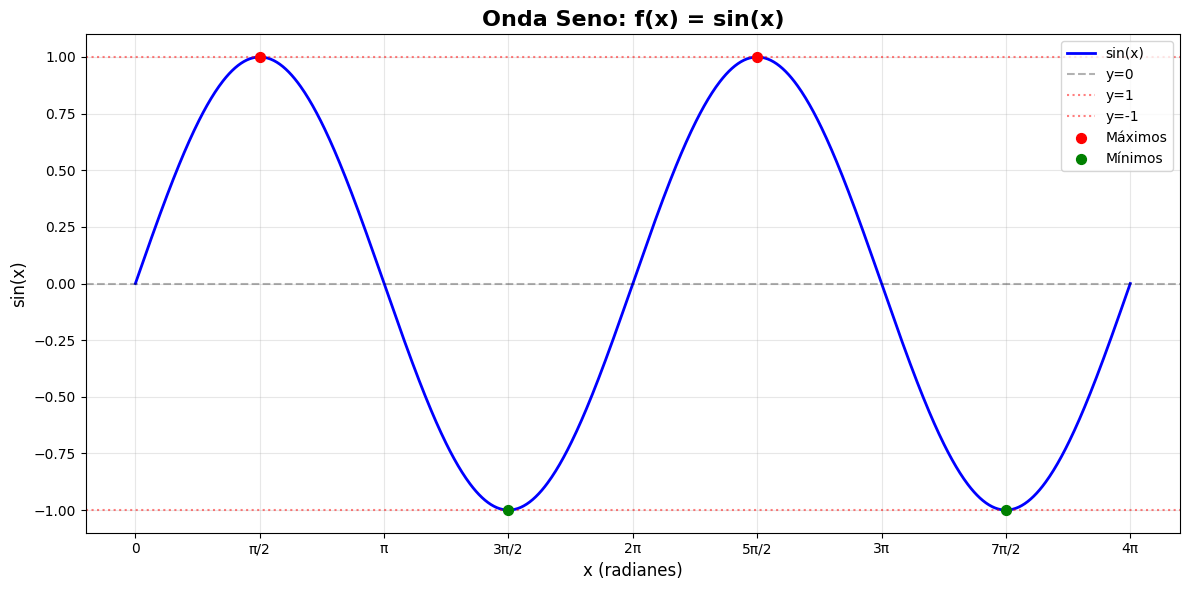

EJERCICIO 2: Histograma con Dataset Aleatorio usando Seaborn
🔧 Generando datasets aleatorios...
📊 Datasets creados:
  - Normal: media=50.29, std=14.68
  - Exponencial: media=2.02, std=2.00
  - Uniforme: media=49.45, std=28.88
  - Bimodal: media=50.06, std=21.75
✅ Histogramas guardados como 'histograms_seaborn.png'


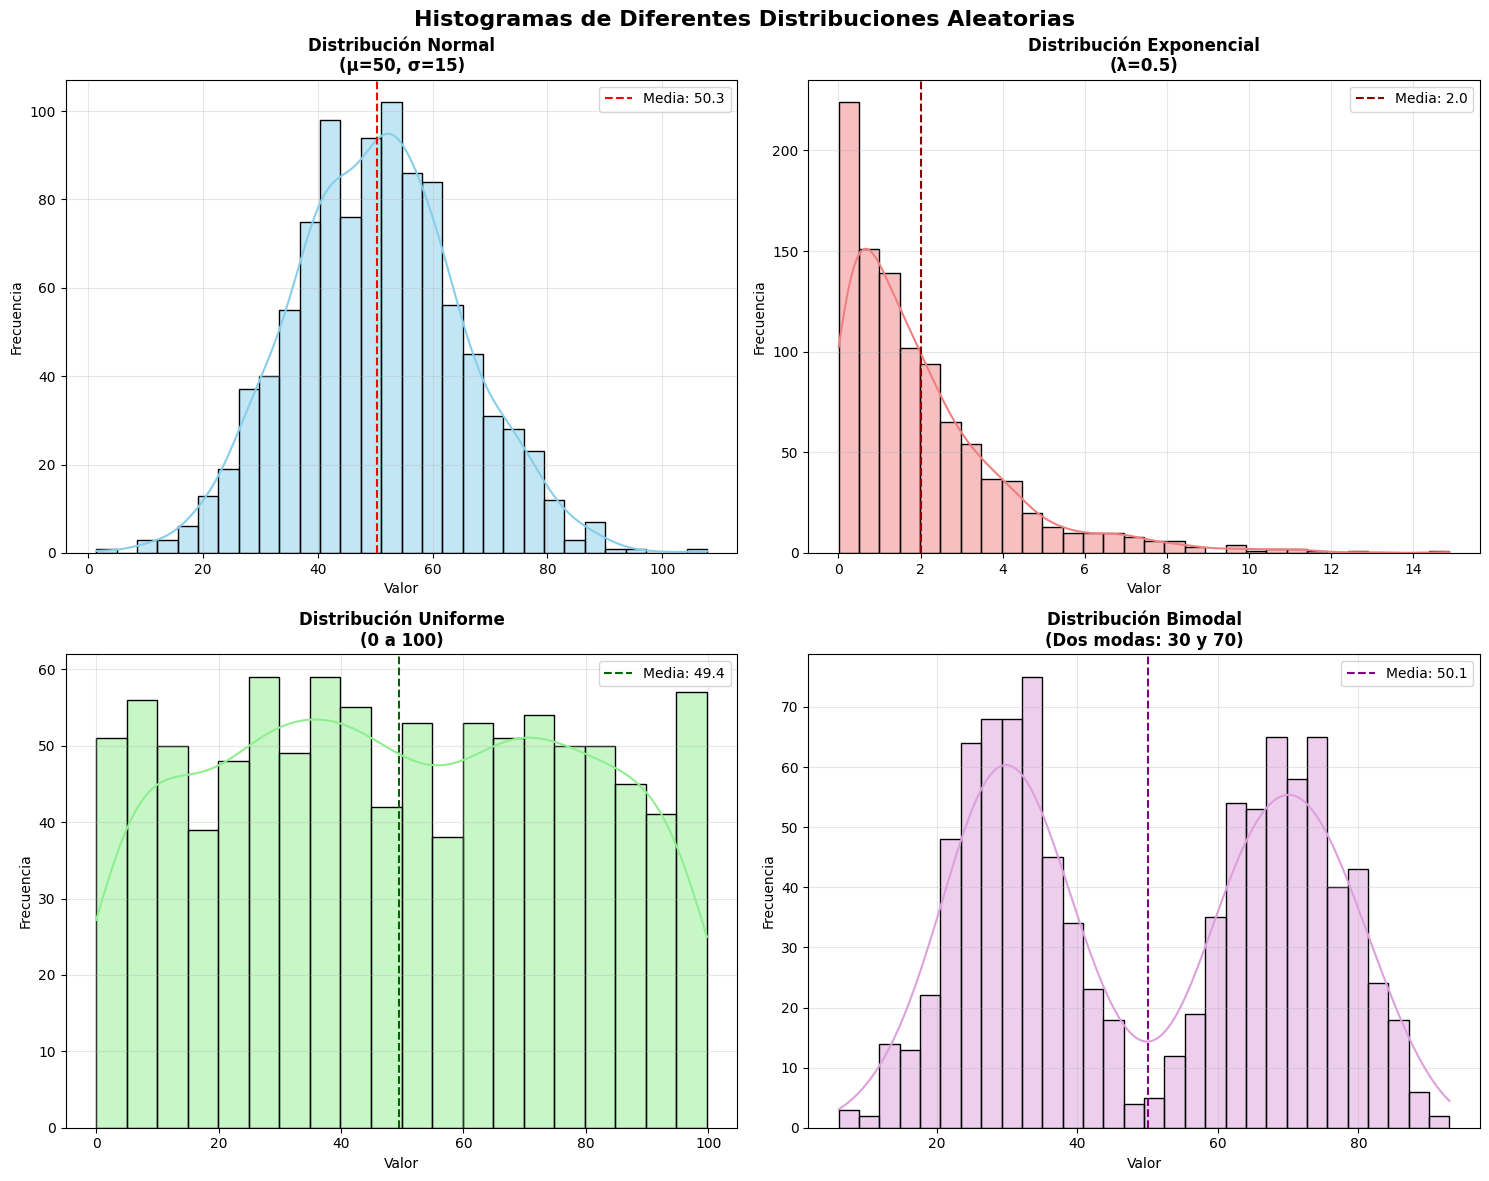


🎨 Creando histograma avanzado con características adicionales...
✅ Comparación avanzada guardada como 'advanced_histogram_comparison.png'


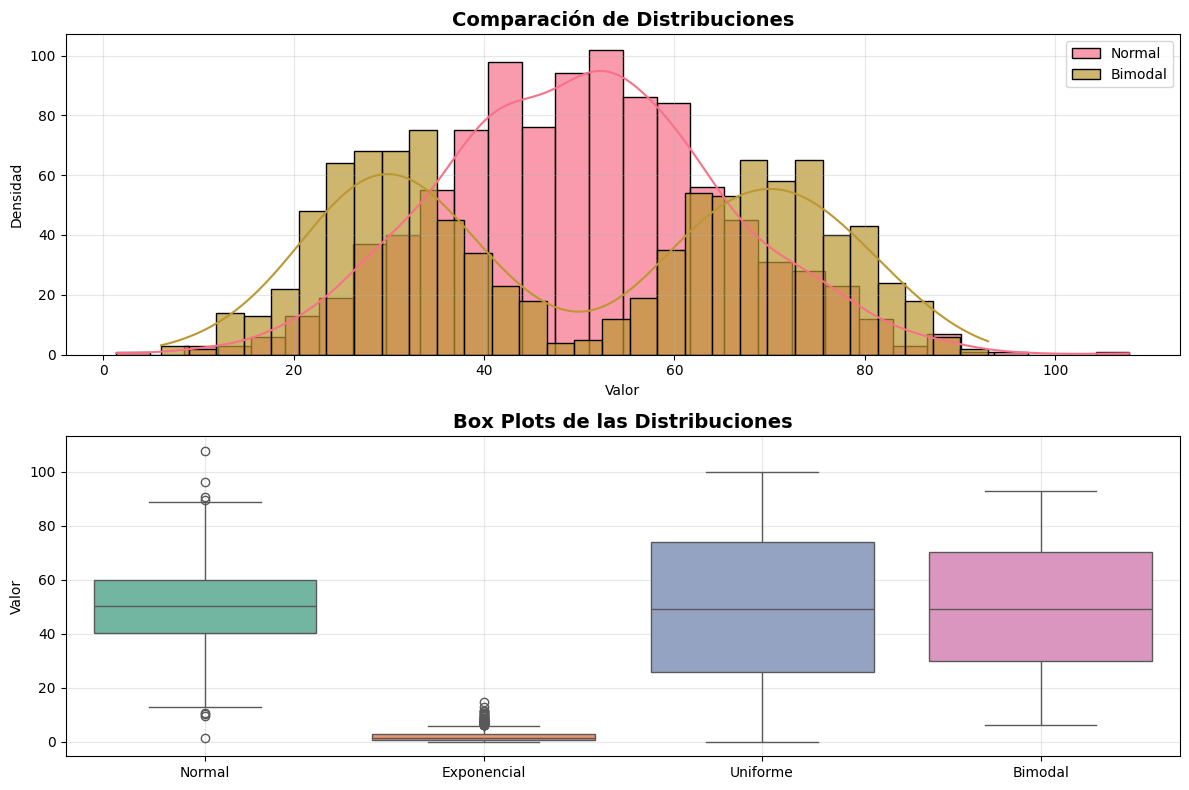


📈 RESUMEN ESTADÍSTICO:

Normal:
  Media: 50.290
  Mediana: 50.380
  Desviación estándar: 14.681
  Mínimo: 1.381
  Máximo: 107.791
  Asimetría: 0.117

Exponencial:
  Media: 2.016
  Mediana: 1.452
  Desviación estándar: 2.005
  Mínimo: 0.006
  Máximo: 14.883
  Asimetría: 1.981

Uniforme:
  Media: 49.449
  Mediana: 49.171
  Desviación estándar: 28.878
  Mínimo: 0.001
  Máximo: 99.782
  Asimetría: 0.010

Bimodal:
  Media: 50.058
  Mediana: 49.234
  Desviación estándar: 21.749
  Mínimo: 6.071
  Máximo: 92.947
  Asimetría: 0.024

🎉 ¡Ejercicio de visualización completado exitosamente!
📁 Archivos generados:
  - sine_wave_plot.png
  - histograms_seaborn.png
  - advanced_histogram_comparison.png


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurar el estilo para mejores visualizaciones
plt.style.use('default')
sns.set_palette("husl")

print("=" * 60)
print("EJERCICIO 1: Gráfico de Línea de Onda Seno con Matplotlib")
print("=" * 60)

# 1. CREAR DATOS PARA LA ONDA SENO
# ================================

# Generar valores de x desde 0 hasta 4π con 1000 puntos
x = np.linspace(0, 4*np.pi, 1000)

# Calcular los valores de y usando la función seno
y = np.sin(x)

print(f"📊 Datos generados:")
print(f"  - Rango de x: {x.min():.2f} a {x.max():.2f}")
print(f"  - Número de puntos: {len(x)}")
print(f"  - Rango de y (seno): {y.min():.2f} a {y.max():.2f}")

# 2. CREAR EL GRÁFICO DE LÍNEA
# ============================

plt.figure(figsize=(12, 6))

# Crear el gráfico de línea principal
plt.plot(x, y, 'b-', linewidth=2, label='sin(x)')

# Agregar líneas de referencia
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3, label='y=0')
plt.axhline(y=1, color='r', linestyle=':', alpha=0.5, label='y=1')
plt.axhline(y=-1, color='r', linestyle=':', alpha=0.5, label='y=-1')

# Marcar puntos importantes (máximos y mínimos)
max_points_x = [np.pi/2, 5*np.pi/2]  # π/2, 5π/2
max_points_y = [1, 1]
min_points_x = [3*np.pi/2, 7*np.pi/2]  # 3π/2, 7π/2
min_points_y = [-1, -1]

plt.scatter(max_points_x, max_points_y, color='red', s=50, zorder=5, label='Máximos')
plt.scatter(min_points_x, min_points_y, color='green', s=50, zorder=5, label='Mínimos')

# Personalizar el gráfico
plt.title('Onda Seno: f(x) = sin(x)', fontsize=16, fontweight='bold')
plt.xlabel('x (radianes)', fontsize=12)
plt.ylabel('sin(x)', fontsize=12)

# Configurar los ticks del eje x en múltiplos de π
pi_ticks = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi, 5*np.pi/2, 3*np.pi, 7*np.pi/2, 4*np.pi])
pi_labels = ['0', 'π/2', 'π', '3π/2', '2π', '5π/2', '3π', '7π/2', '4π']
plt.xticks(pi_ticks, pi_labels)

# Agregar grid y leyenda
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

# Ajustar márgenes
plt.tight_layout()

# Guardar el gráfico
plt.savefig('sine_wave_plot.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico de onda seno guardado como 'sine_wave_plot.png'")

# Mostrar el gráfico
plt.show()

print("=" * 60)
print("EJERCICIO 2: Histograma con Dataset Aleatorio usando Seaborn")
print("=" * 60)

# 2. CREAR DATASET ALEATORIO
# ==========================

# Fijar seed para reproducibilidad
np.random.seed(42)

# Generar diferentes tipos de distribuciones
print("🔧 Generando datasets aleatorios...")

# Dataset 1: Distribución normal
data_normal = np.random.normal(50, 15, 1000)  # media=50, std=15, 1000 muestras

# Dataset 2: Distribución exponencial
data_exponential = np.random.exponential(2, 1000)  # escala=2, 1000 muestras

# Dataset 3: Distribución uniforme
data_uniform = np.random.uniform(0, 100, 1000)  # entre 0 y 100, 1000 muestras

# Dataset 4: Distribución bimodal (mezcla de dos normales)
data_bimodal = np.concatenate([
    np.random.normal(30, 8, 500),   # Primera moda
    np.random.normal(70, 8, 500)    # Segunda moda
])

print(f"📊 Datasets creados:")
print(f"  - Normal: media={data_normal.mean():.2f}, std={data_normal.std():.2f}")
print(f"  - Exponencial: media={data_exponential.mean():.2f}, std={data_exponential.std():.2f}")
print(f"  - Uniforme: media={data_uniform.mean():.2f}, std={data_uniform.std():.2f}")
print(f"  - Bimodal: media={data_bimodal.mean():.2f}, std={data_bimodal.std():.2f}")

# 3. CREAR HISTOGRAMAS CON SEABORN
# ================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Histogramas de Diferentes Distribuciones Aleatorias', fontsize=16, fontweight='bold')

# Histograma 1: Distribución Normal
sns.histplot(data_normal, bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribución Normal\n(μ=50, σ=15)', fontweight='bold')
axes[0, 0].set_xlabel('Valor')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Agregar estadísticas al gráfico
axes[0, 0].axvline(data_normal.mean(), color='red', linestyle='--', 
                   label=f'Media: {data_normal.mean():.1f}')
axes[0, 0].legend()

# Histograma 2: Distribución Exponencial
sns.histplot(data_exponential, bins=30, kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribución Exponencial\n(λ=0.5)', fontweight='bold')
axes[0, 1].set_xlabel('Valor')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 1].axvline(data_exponential.mean(), color='darkred', linestyle='--',
                   label=f'Media: {data_exponential.mean():.1f}')
axes[0, 1].legend()

# Histograma 3: Distribución Uniforme
sns.histplot(data_uniform, bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribución Uniforme\n(0 a 100)', fontweight='bold')
axes[1, 0].set_xlabel('Valor')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 0].axvline(data_uniform.mean(), color='darkgreen', linestyle='--',
                   label=f'Media: {data_uniform.mean():.1f}')
axes[1, 0].legend()

# Histograma 4: Distribución Bimodal
sns.histplot(data_bimodal, bins=30, kde=True, ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Distribución Bimodal\n(Dos modas: 30 y 70)', fontweight='bold')
axes[1, 1].set_xlabel('Valor')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 1].axvline(data_bimodal.mean(), color='purple', linestyle='--',
                   label=f'Media: {data_bimodal.mean():.1f}')
axes[1, 1].legend()

# Ajustar espaciado
plt.tight_layout()

# Guardar el gráfico
plt.savefig('histograms_seaborn.png', dpi=300, bbox_inches='tight')
print("✅ Histogramas guardados como 'histograms_seaborn.png'")

# Mostrar el gráfico
plt.show()

# 4. HISTOGRAMA ADICIONAL CON MÁS CARACTERÍSTICAS DE SEABORN
# ==========================================================

print("\n🎨 Creando histograma avanzado con características adicionales...")

plt.figure(figsize=(12, 8))

# Crear un histograma más sofisticado con múltiples datasets
plt.subplot(2, 1, 1)
sns.histplot(data_normal, bins=30, alpha=0.7, label='Normal', kde=True)
sns.histplot(data_bimodal, bins=30, alpha=0.7, label='Bimodal', kde=True)
plt.title('Comparación de Distribuciones', fontweight='bold', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot complementario
plt.subplot(2, 1, 2)
data_combined = {
    'Normal': data_normal,
    'Exponencial': data_exponential,
    'Uniforme': data_uniform,
    'Bimodal': data_bimodal
}

# Crear DataFrame para seaborn
import pandas as pd
df_combined = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_combined.items()]))

# Crear box plots
sns.boxplot(data=df_combined, palette='Set2')
plt.title('Box Plots de las Distribuciones', fontweight='bold', fontsize=14)
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('advanced_histogram_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Comparación avanzada guardada como 'advanced_histogram_comparison.png'")
plt.show()

# 5. RESUMEN ESTADÍSTICO
# ======================

print("\n📈 RESUMEN ESTADÍSTICO:")
print("=" * 50)

datasets = {
    'Normal': data_normal,
    'Exponencial': data_exponential,
    'Uniforme': data_uniform,
    'Bimodal': data_bimodal
}

for name, data in datasets.items():
    print(f"\n{name}:")
    print(f"  Media: {np.mean(data):.3f}")
    print(f"  Mediana: {np.median(data):.3f}")
    print(f"  Desviación estándar: {np.std(data):.3f}")
    print(f"  Mínimo: {np.min(data):.3f}")
    print(f"  Máximo: {np.max(data):.3f}")
    print(f"  Asimetría: {stats.skew(data):.3f}")

print(f"\n🎉 ¡Ejercicio de visualización completado exitosamente!")
print("=" * 60)
print("📁 Archivos generados:")
print("  - sine_wave_plot.png")
print("  - histograms_seaborn.png") 
print("  - advanced_histogram_comparison.png")